## Price Prediction Challenge for a Mercari Shopping online App

## Data Exploration 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt


In [3]:
import os
os.getcwd()
os.chdir("C:\\Users\\srita\\Python\\Kaggle\\Mercari Price Challenge")

In [4]:
#Read the data
df = pd.read_csv("train.tsv",delimiter='\t',encoding='utf-8')

df.head(5)
    

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


## Data Characterstics

In [5]:
df.dtypes

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

### Extract the general information about the dataset

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
train_id             1482535 non-null int64
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1476208 non-null object
brand_name           849853 non-null object
price                1482535 non-null float64
shipping             1482535 non-null int64
item_description     1482531 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


### Missing values

In [7]:
df.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

## Category Count and Duplicate Records
### Does the item names are unique? or items share the same name?

In [8]:
i = df.name.value_counts().size
print("Number of distinct names:", i)

Number of distinct names: 1225273


In [9]:
#How many Categories are there?
cate_items = df.category_name.value_counts().size
print("We have", cate_items, "Item Categories ")

We have 1287 Item Categories 


In [10]:
#How many brand names are there?
brand_names = df.brand_name.value_counts().size
print("We have", brand_names, "Brands ")

We have 4809 Brands 


In [15]:
#Duplicate Records
#dup_records = df.train_id.unique().size
dup_records = df[df.train_id.duplicated(keep=False)]
a = dup_records.groupby('train_id').apply(lambda x: list(x.index))
#print(len(a))
print("We have", len(a), "Duplicate Records")

We have 0 Duplicate Records


### Outliers

In [17]:
#Checking the outliers,
#What is the Highest price and What is the category and brand name
items_price = df.groupby(df.price)
items_price = pd.DataFrame(items_price.max())

In [29]:
Y = df['price']
lowest_price = np.min(Y)
print("Lowest price is:",lowest_price)

Lowest price is: 0.0


In [20]:
Y = df['price']
highest_price = np.max(Y)
print("Highest price is:",highest_price)

Highest price is: 2009.0


In [21]:
items_price.reset_index(level=0,inplace=True)


In [22]:
price = items_price.sort_values(by="price",ascending=False)

price.loc[(price["price"] > 1500)]

,price,train_id,name,item_condition_id,shipping
827,2009.0,760469,NEW Chanel WOC Caviar Gold Hardware,1,0
826,2006.0,1262245,NEW-Chanel Boy Wallet o Chain WOC Caviar,1,0
825,2004.0,1393600,David Yurman Wheaton ring,2,0
824,2000.0,1445348,Vs2/I 1ct Diamond Engagement Ring,3,1
823,1999.0,952000,Chanel J12 H0682 Wrist Watch for Women,3,1
822,1909.0,180749,NEW apple products,1,0
821,1900.0,194639,iPad Pro,1,1
820,1850.0,1267555,Guarenteed authentic Chanel classic flap,3,1
819,1815.0,1227002,Louis Vuitton luggage,2,0
818,1808.0,449729,AUTH Louis Vuitton Palm Springs MM,2,0


In [23]:
price.loc[(price["price"] > 1500)].name.head()

827         NEW Chanel WOC Caviar Gold Hardware
826    NEW-Chanel Boy Wallet o Chain WOC Caviar
825                   David Yurman Wheaton ring
824           Vs2/I 1ct Diamond Engagement Ring
823      Chanel J12 H0682 Wrist Watch for Women
Name: name, dtype: object

In [24]:
price.loc[(price["name"] == "David Yurman Wheaton ring")]

,price,train_id,name,item_condition_id,shipping
825,2004.0,1393600,David Yurman Wheaton ring,2,0


In [25]:
df.loc[(df["price"] >1500)].brand_name.head()

1971             Chanel
145696    Louis Vuitton
164527    Saint Laurent
180749            Apple
182847           Chanel
Name: brand_name, dtype: object

In [26]:
df.loc[(df["price"] > 1800) & (df["item_condition_id"] > 1)].item_description

182847     Elegant authentic chanel boy bag made in Franc...
244054                               9/10 condition like new
415027     Authentic. Pre-loved in Excellent Condition. P...
449729     This bag is in really good condition. Barely u...
607957     Almost brand new used only once! In grained ca...
645320     Comes with original box, care booklet and auth...
952000     HELLO , I HAVE A BLACK CHANEL WATCH J12 CERAMI...
1250053    This is a brand new Chanel CC Quilted Wallet o...
1267555    100% guarenteed authentic Chanel classic flap ...
1393600    David Yurman Wheaton wing. Size 6. Original re...
1445348    Absolutely stunning diamond engagement ring Pu...
Name: item_description, dtype: object

In [27]:
price_bins = pd.cut(Y, 10, labels = ['LVLow','UVLow','LLow','ULow','LMedium','UMedium','LHigh','UHigh','LVHigh','UVHigh'])
df['price_bins'] = price_bins
print("Number of items less than 200",len(df.loc[(df['price_bins'] == 'LVLow')]))
print("Number of items between 200 and 400",len(df.loc[(df['price_bins'] == 'UVLow')]))
print("Number of items between 400 and 600",len(df.loc[(df['price_bins'] == 'LLow')]))
print("Number of items between 600 and 800",len(df.loc[(df['price_bins'] == 'ULow')]))
print("Number of items between 800 and 1000",len(df.loc[(df['price_bins'] == 'LMedium')]))
print("Number of items between 1000 and 1200",len(df.loc[(df['price_bins'] == 'UMedium')]))
print("Number of items between 1200 and 1400",len(df.loc[(df['price_bins'] == 'LHigh')]))
print("Number of items between 1400 and 1600",len(df.loc[(df['price_bins'] == 'UHigh')]))
print("Number of items between 1600 and 1800",len(df.loc[(df['price_bins'] == 'LVHigh')]))
print("Number of items between 1800 and above",len(df.loc[(df['price_bins'] == 'UVHigh')]))

Number of items less than 200 1472289
Number of items between 200 and 400 8335
Number of items between 400 and 600 1169
Number of items between 600 and 800 399
Number of items between 800 and 1000 178
Number of items between 1000 and 1200 65
Number of items between 1200 and 1400 47
Number of items between 1400 and 1600 21
Number of items between 1600 and 1800 16
Number of items between 1800 and above 16


In [28]:
# Drop missing values
df.dropna(inplace=True)

df.dropna(inplace=True)
df.head(10)
df.set_index('train_id')


,name,item_condition_id,category_name,brand_name,price,shipping,item_description,price_bins
train_id,,,,,,,,
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,LVLow
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,LVLow
6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...,LVLow
7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...,LVLow
8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.,LVLow
10,Smashbox primer,2,Beauty/Makeup/Face,Smashbox,8.0,1,0.25 oz Full size is 1oz for [rm] in Sephora,LVLow
11,New vs pi k body mists,1,Beauty/Fragrance/Women,Victoria's Secret,34.0,0,(5) new vs pink body mists (2.5 oz each) Fresh...,LVLow
12,Black Skater dress,2,"Women/Dresses/Above Knee, Mini",rue,16.0,0,"Xl, great condition",LVLow
13,Sharpener and eraser,1,Other/Office supplies/School Supplies,Scholastic,4.0,1,No description yet,LVLow


## Visualization

C:\Users\srita\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


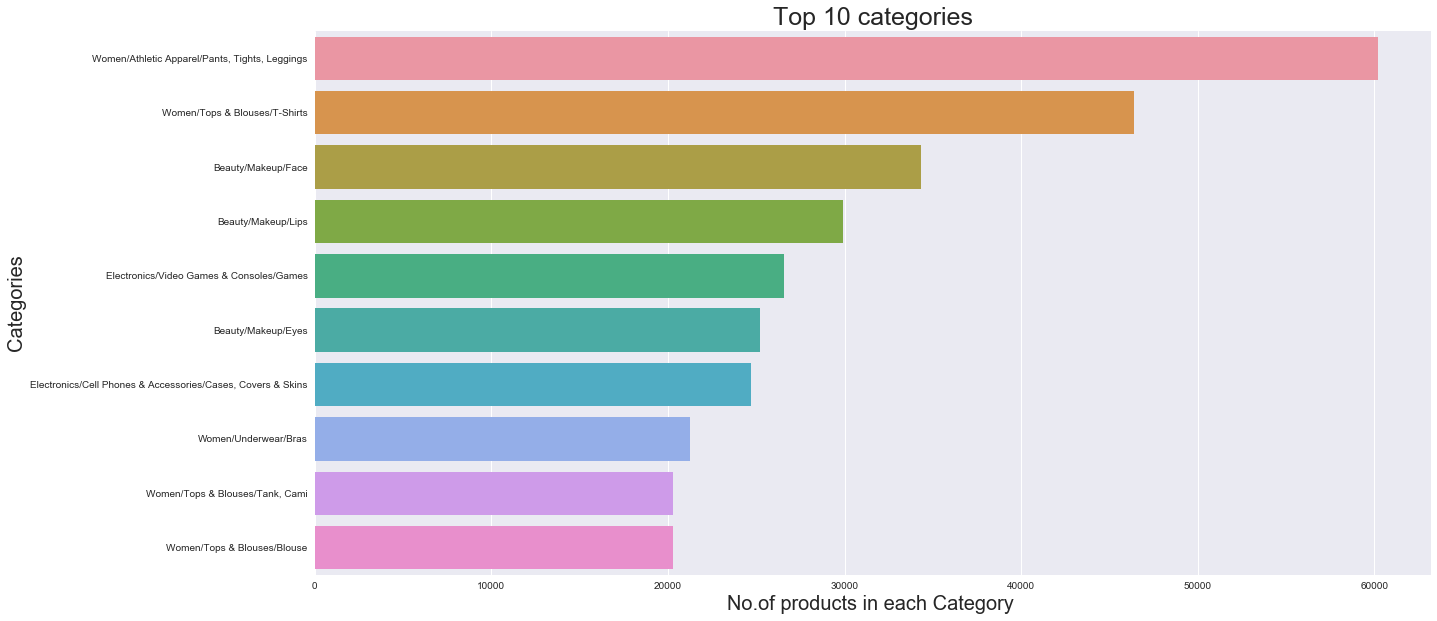

In [76]:
plt.figure(figsize=(20,10))
sb.countplot(y=train.category_name,order=train.category_name.value_counts().iloc[:10].index,orient='v')
plt.title("Top 10 categories",fontsize=25)
plt.xlabel("No.of products in each Category ",fontsize=20)
plt.ylabel("Categories",fontsize=20)
plt.show()

In [61]:
order=train.category_name.value_counts().iloc[:10]
#print(order)

## Top 20 categories by Mean Price

In [62]:
#Group by category and sort the categories by Price
group = train.groupby(train.category_name)
mean_price = pd.DataFrame(group.price.mean()).head(20)
mean_price = mean_price.sort_values(by="price",ascending=False)
mean_price.reset_index(level=0,inplace=True)
mean_price.head()


,category_name,price
0,Beauty/Hair Care/Other,34.291262
1,Beauty/Hair Care/Hair Perms & Texturizers,30.200000
2,Beauty/Fragrance/Men,28.555818
3,Beauty/Fragrance/Sets,25.603037
4,Beauty/Fragrance/Other,24.794872


C:\Users\srita\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


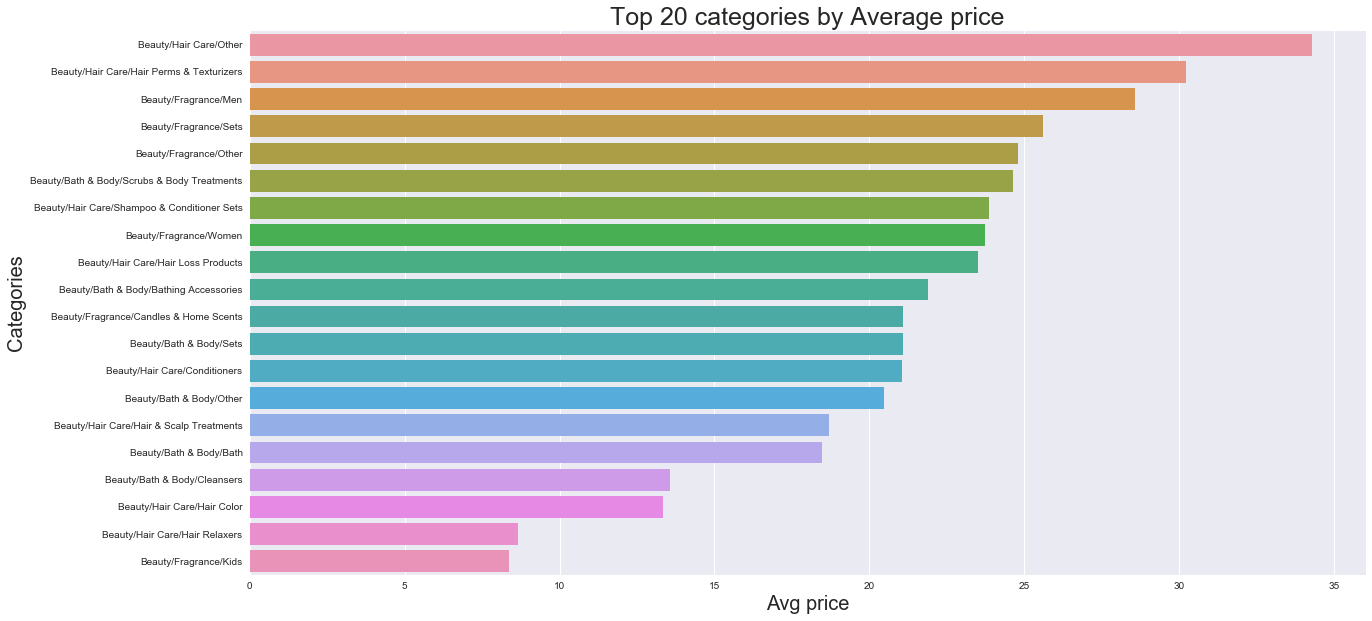

In [75]:
#Plot the Top 20 categories
plt.figure(figsize=(20,10))
sb.barplot(x='price',y='category_name',data=mean_price,orient='h')
plt.title("Top 20 categories by Average price",fontsize=25)
plt.xlabel("Avg price",fontsize=20)
plt.ylabel("Categories",fontsize=20)
plt.show()

Some categories are cheap and some are not

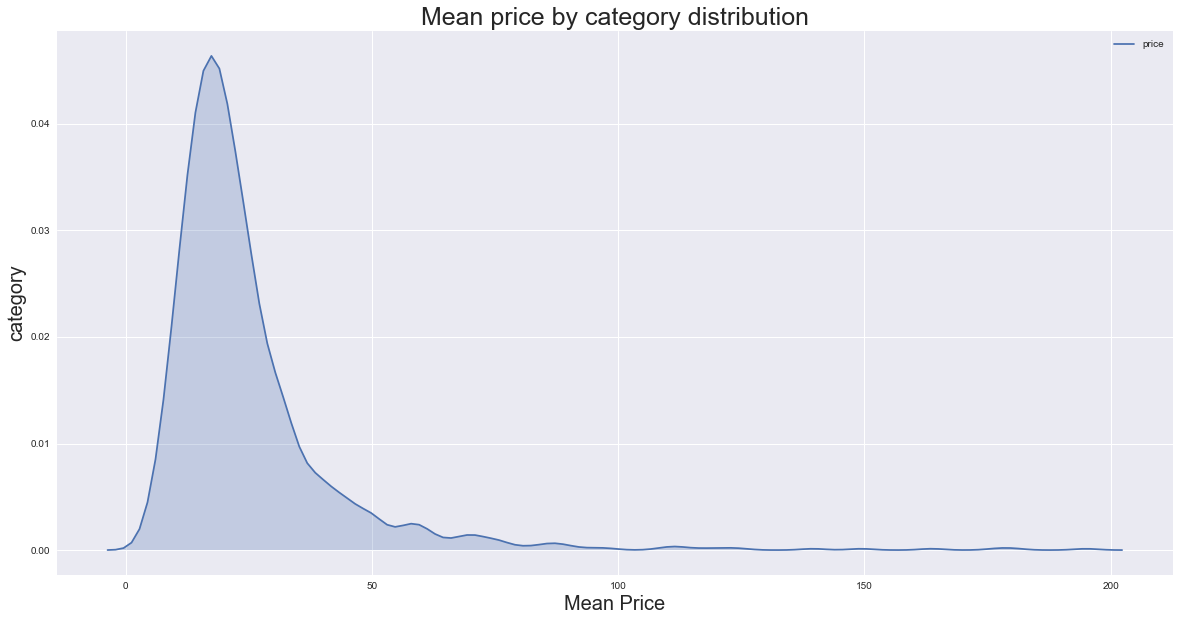

In [74]:
#Split the categories by Mean price
mean_price_2 = pd.DataFrame(group.price.mean())
mean_price_2.reset_index(level=0,inplace=True)
plt.figure(figsize=(20,10))
sb.kdeplot(mean_price_2.price,shade=True)
plt.title("Mean price by category distribution",fontsize=25)
plt.xlabel("Mean Price",fontsize=20)
plt.ylabel("category",fontsize=20)
plt.show()

 split the categories by level

In [64]:
train['cat1'] = train.category_name.str.extract('([^/]+)/[^/]+/[^/]+')
train['cat2'] = train.category_name.str.extract('([^/]+/[^/]+)/[^/]+')
train.head()

C:\Users\srita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.
C:\Users\srita\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,cat1,cat2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Men/Tops
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Electronics/Computers & Tablets
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Women/Tops & Blouses
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home/Home Décor
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Women/Jewelry


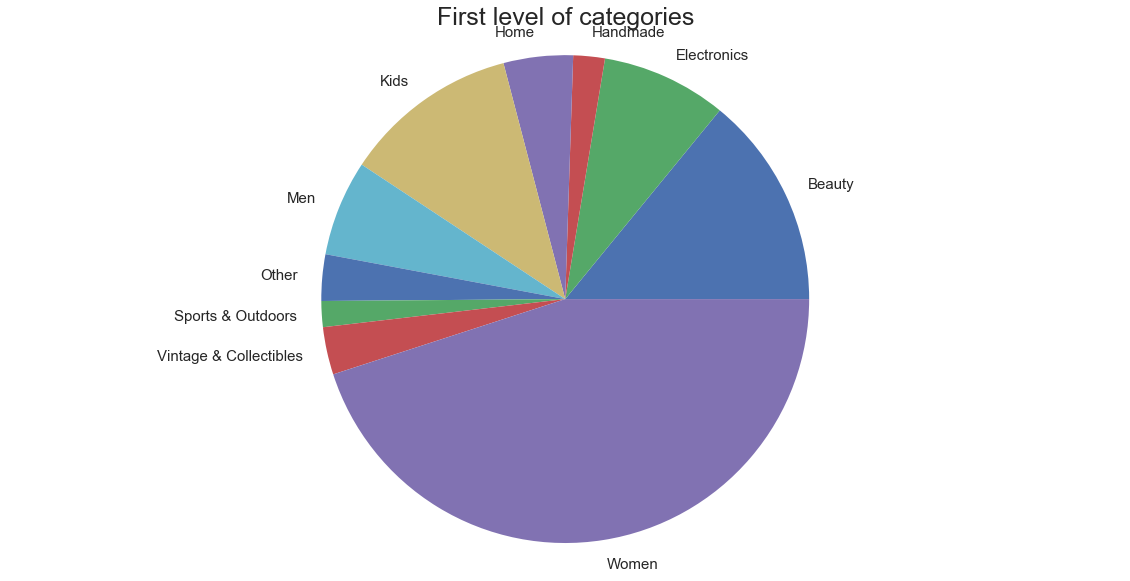

In [73]:
plt.figure(figsize=(20,10))
train.name.groupby(train.cat1).count().plot(kind='pie',fontsize=15)
plt.title("First level of categories", fontsize=25)
plt.axis('equal')
plt.ylabel('')
plt.show()

# Second level of categories

In [66]:
alldf = {}
for col in train.cat1[train.cat1.isnull()==False].unique():
    temp = train.cat2[train['cat1'] == col]
    temp = pd.DataFrame(temp.value_counts().reset_index())
    alldf[col] = temp
    


In [67]:
i = 0
fig, axs = plt.subplots(5,2,figsize=(20,20))
plt.suptitle("Second level of categories", fontsize=25)

for cat in alldf:
    temp = alldf[cat]
    sb.barplot('cat2','index',data=temp,ax=axs.flatten()[i])
    axs.flatten()[i].set_ylabel('')
    axs.flatten()[i].set_xlabel("Frequency")
    
    i+=1

C:\Users\srita\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


## price by first level of category

In [77]:
plt.figure(figsize=(20,20))
sb.boxplot(x='price',y='cat1',data=train,orient='h')
plt.title("Prices of the first level of categories",fontsize=25)
plt.xlabel("Price",fontsize=20)
plt.ylabel("")

C:\Users\srita\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


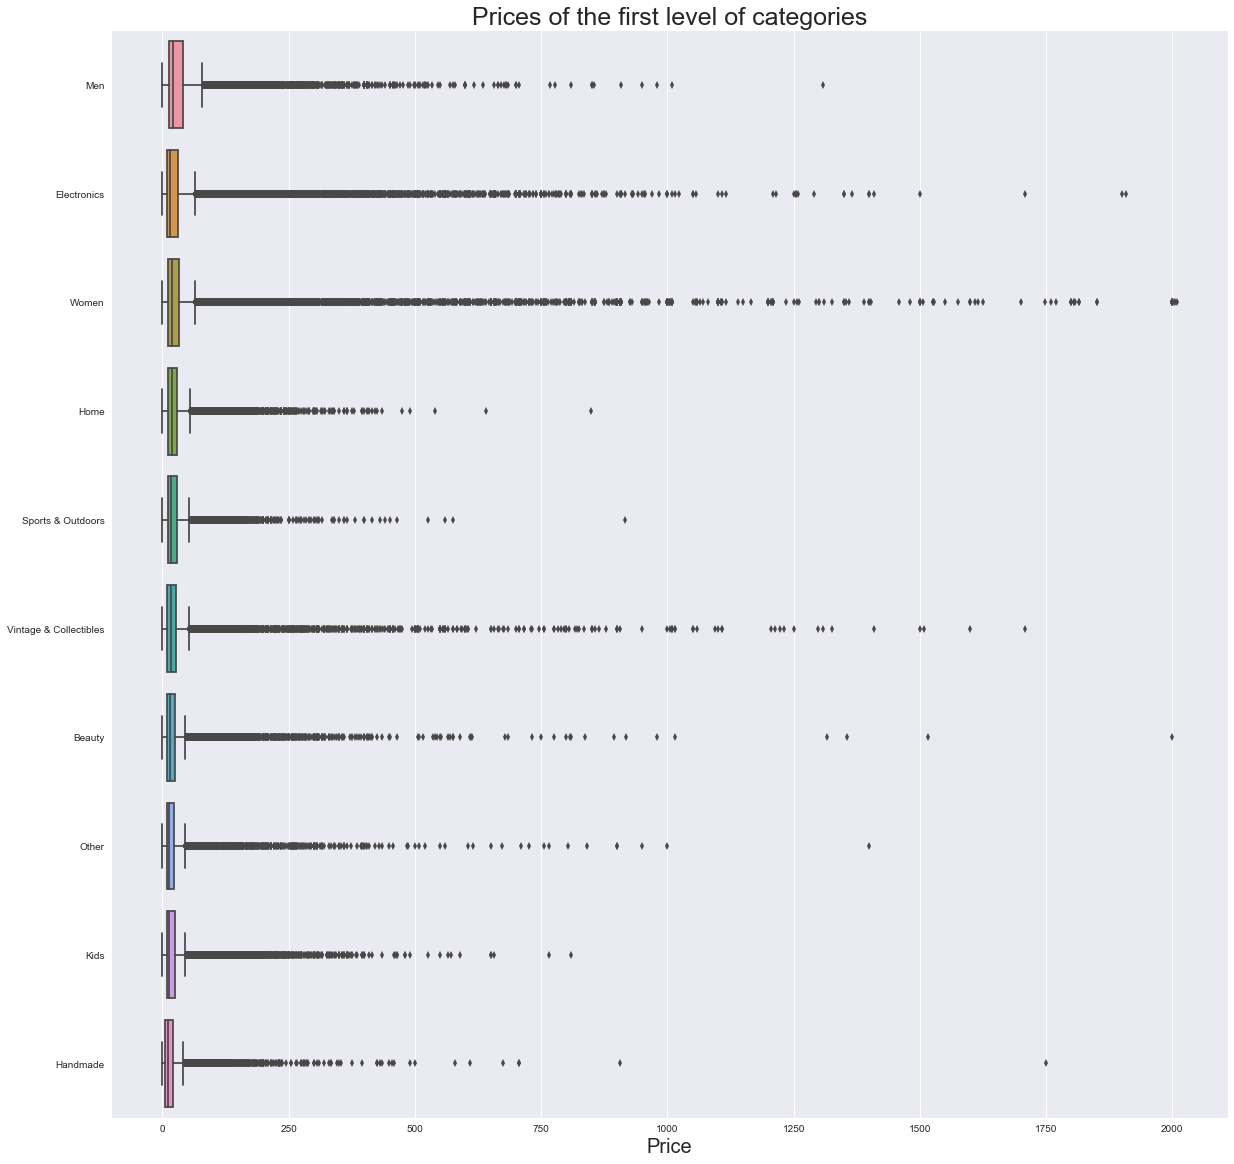

In [78]:
plt.show()